In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

In [2]:
df = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'defun_covid.csv'), sep = '\t', encoding='latin-1')
total = []
for i in df['Total']:
        i = i.replace('.', '')
        if i != '':
            i = float(i)
            total.append(i)
        else:
            total.append(0)
df['Total'] = total

In [3]:
df_h = df[(df['Mes de defunción'] != 'Total') 
        & (df['Sexo'] == 'Hombres')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado'))]

df_m = df[(df['Mes de defunción'] != 'Total') 
        & (df['Sexo'] == 'Mujeres')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado'))]

df_t = df[(df['Mes de defunción'] != 'Total')
        & (df['Sexo'] == 'Total')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado'))]

df_h = df_h.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()
df_m = df_m.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()
df_t = df_t.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

In [4]:
df_t = df[(df['Mes de defunción'] == 'Total')
        & (df['Sexo'] == 'Total')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado'))]

df_t = df_t.groupby(by = 'Covid-19', sort = False, as_index = False)['Total'].sum().set_index('Covid-19')

df_t.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'covid1.csv'))

In [5]:
df_t = df[(df['Mes de defunción'] == 'Total')
        & (df['Sexo'] == 'Total')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado') | (df['Covid-19'] == 'Covid-19 Virus no identificado (sospechoso)'))]

df_t = df_t.groupby(by = 'Covid-19', sort = False, as_index = False)['Total'].sum()
df_t = df_t.append({'Covid-19' : 'Total' , 'Total' : 45684.0} , ignore_index=True).set_index('Covid-19')

df_t.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'covid2.csv'))

In [6]:
df_h = df[(df['Mes de defunción'] != 'Total') 
        & (df['Sexo'] == 'Hombres')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado') | (df['Covid-19'] == 'Covid-19 Virus no identificado (sospechoso)'))]

df_m = df[(df['Mes de defunción'] != 'Total') 
        & (df['Sexo'] == 'Mujeres')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado') | (df['Covid-19'] == 'Covid-19 Virus no identificado (sospechoso)'))]

df_t = df[(df['Mes de defunción'] != 'Total')
        & (df['Sexo'] == 'Total')
        & (df['Edad'] == 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado') | (df['Covid-19'] == 'Covid-19 Virus no identificado (sospechoso)'))]

df_h = df_h.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()
df_m = df_m.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()
df_t = df_t.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

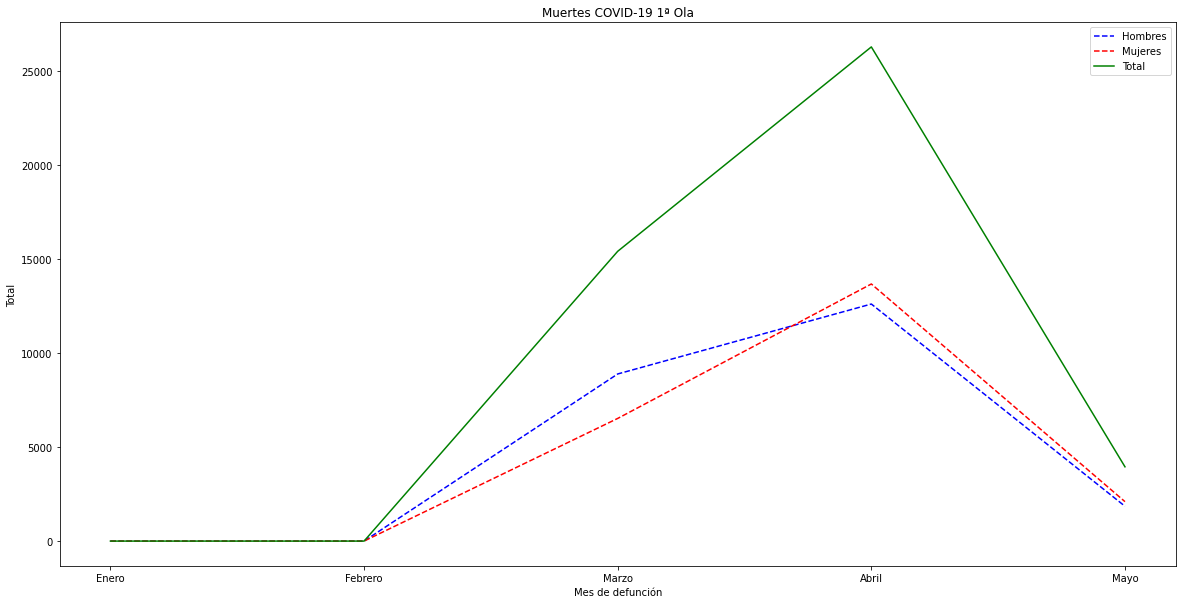

In [7]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df_h, x = 'Mes de defunción', y = 'Total', label = 'Hombres', color = 'b', linestyle = '--');
sns.lineplot(data = df_m, x = 'Mes de defunción', y = 'Total', label = 'Mujeres', color = 'r', linestyle = '--');
sns.lineplot(data = df_t, x = 'Mes de defunción', y = 'Total', label = 'Total', color = 'g');
plt.title('Muertes COVID-19 1ª Ola')
plt.legend()

plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'muertes_virus2.png'))

In [8]:
df_t = df[(df['Mes de defunción'] != 'Total')
        & (df['Sexo'] == 'Total')
        & (df['Edad'] != 'Total')
        & ((df['Covid-19'] == 'Covid-19 Virus identificado'))]

de_0_49 = df_t[df_t['Edad'] == 'De 0 a 49 años']
de_0_49 = de_0_49.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_50_54 = df_t[df_t['Edad'] == 'De 50 a 54 años']
de_50_54 = de_50_54.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_55_59 = df_t[df_t['Edad'] == 'De 55 a 59 años']
de_55_59 = de_55_59.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_60_64 = df_t[df_t['Edad'] == 'De 60 a 64 años']
de_60_64 = de_60_64.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_65_69 = df_t[df_t['Edad'] == 'De 65 a 69 años']
de_65_69 = de_65_69.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_70_74 = df_t[df_t['Edad'] == 'De 70 a 74 años']
de_70_74 = de_70_74.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_75_79 = df_t[df_t['Edad'] == 'De 75 a 79 años']
de_75_79 = de_75_79.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_80_84 = df_t[df_t['Edad'] == 'De 80 a 84 años']
de_80_84 = de_80_84.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_85_89 = df_t[df_t['Edad'] == 'De 85 a 89 años']
de_85_89 = de_85_89.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_90_94 = df_t[df_t['Edad'] == 'De 90 a 94 años']
de_90_94 = de_90_94.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

de_95 = df_t[df_t['Edad'] == '95 y más años']
de_95 = de_95.groupby(by = 'Mes de defunción', sort = False, as_index = False)['Total'].sum()

In [9]:
new_dates = de_0_49['Mes de defunción']
new_dates

0      Enero
1    Febrero
2      Marzo
3      Abril
4       Mayo
Name: Mes de defunción, dtype: object

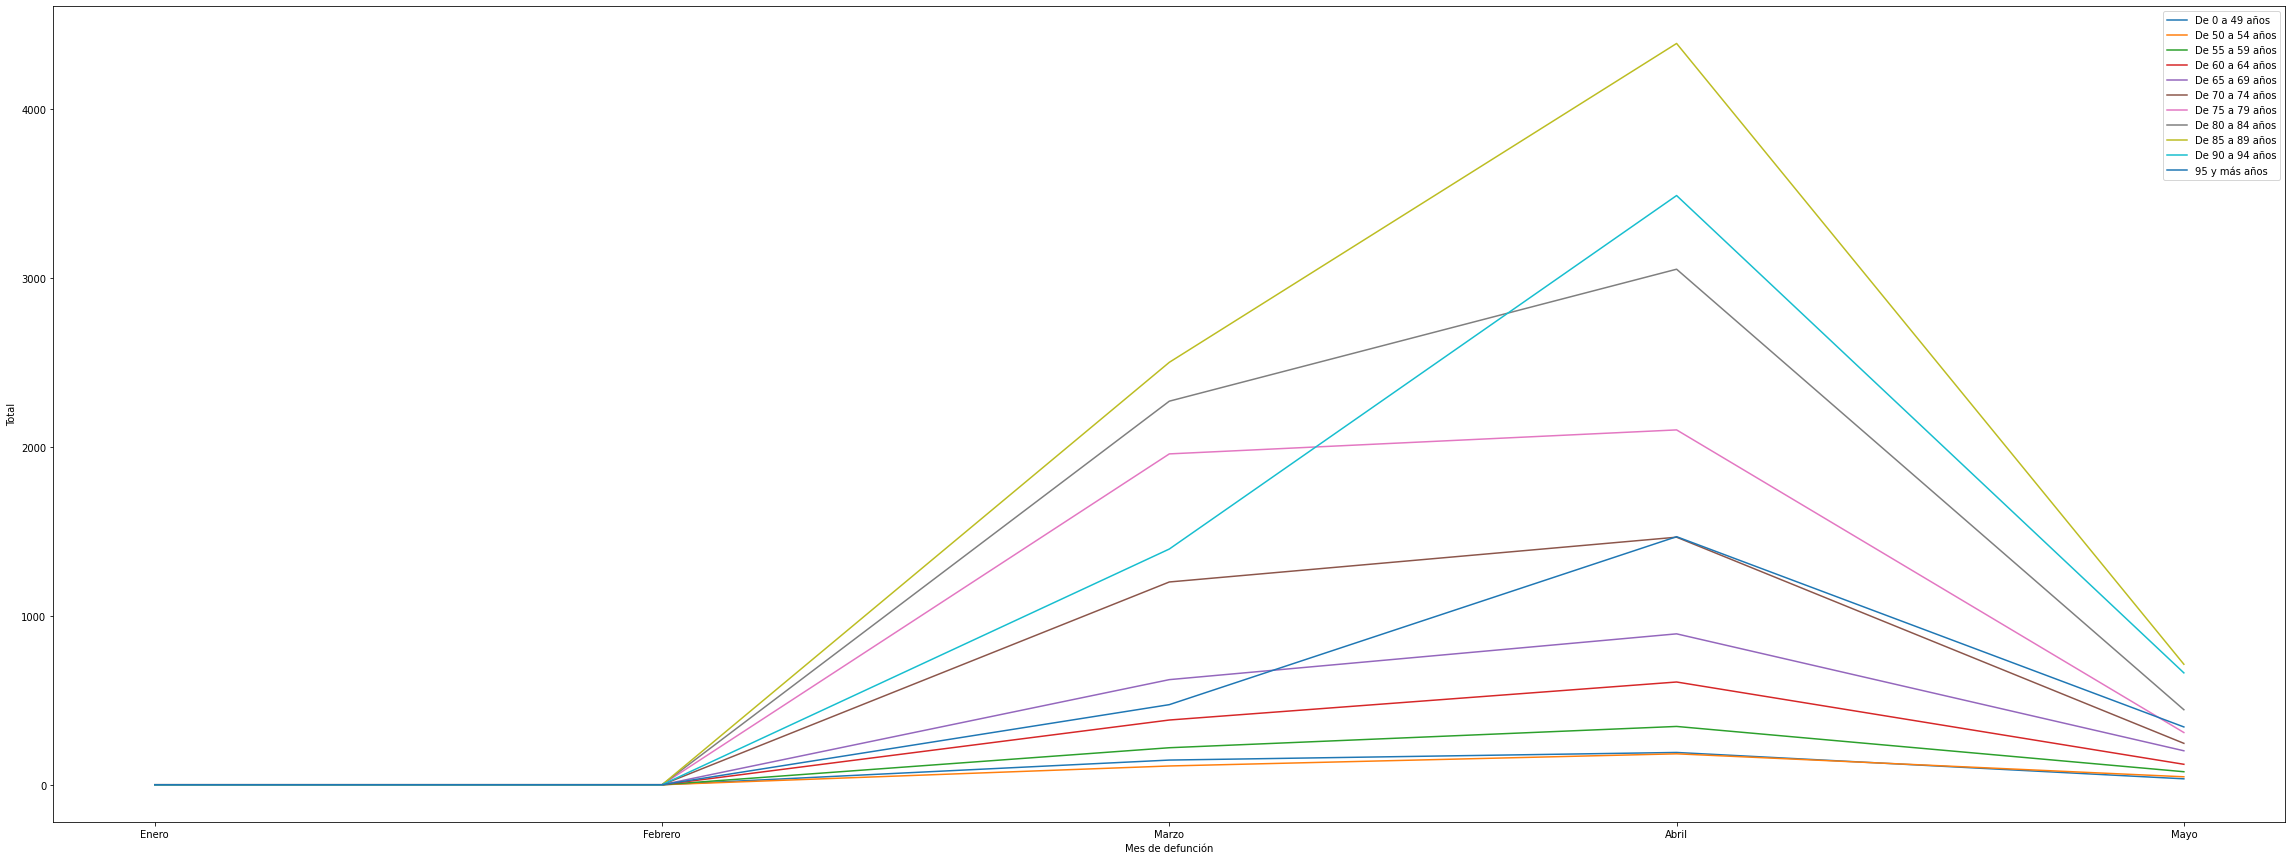

In [10]:
plt.figure(figsize=(40,15))
sns.lineplot(x = new_dates, y = de_0_49['Total'], label = 'De 0 a 49 años');
sns.lineplot(x = new_dates, y = de_50_54['Total'], label = 'De 50 a 54 años');
sns.lineplot(x = new_dates, y = de_55_59['Total'], label = 'De 55 a 59 años');
sns.lineplot(x = new_dates, y = de_60_64['Total'], label = 'De 60 a 64 años');
sns.lineplot(x = new_dates, y = de_65_69['Total'], label = 'De 65 a 69 años');
sns.lineplot(x = new_dates, y = de_70_74['Total'], label = 'De 70 a 74 años');
sns.lineplot(x = new_dates, y = de_75_79['Total'], label = 'De 75 a 79 años');
sns.lineplot(x = new_dates, y = de_80_84['Total'], label = 'De 80 a 84 años');
sns.lineplot(x = new_dates, y = de_85_89['Total'], label = 'De 85 a 89 años');
sns.lineplot(x = new_dates, y = de_90_94['Total'], label = 'De 90 a 94 años');
sns.lineplot(x = new_dates, y = de_95['Total'], label = '95 y más años');
plt.legend()

In [11]:
df = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'causas.csv'), sep = ',')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,n (%),Unnamed: 4
0,0,NaN,2019,2020,p
1,1,Fiebre,"1.027 (21,3)","441 (26,5)","<0,001"
2,2,Síntomas respiratorios,820 (17),"269 (16,1)","0,450"
3,3,Traumatismos (incluye quemadura/mordedura anim...,"595 (12,3)","253 (15,2)","<0,005"
4,4,Dolor,"706 (14,6)","227 (13,6)","0,275"
5,5,Síntomas digestivos (excluye dolor abdominal),"590 (12,2)","81 (4,9)","<0,001"
6,6,Exantema/lesión en piel (sin fiebre),"303 (6,2)","56 (3,4)","<0,001"
7,7,Síntomas neurológicos (excluye cefalea),"93 (1,9)","52 (3,1)","<0,005"
8,8,Bulto/inflamación localizada,"91 (1,8)","40 (2,4)","0,225"
9,9,Alteraciones del comportamiento,"124 (2,5)","33 (2,0)","0,175"


In [12]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df

,Unnamed: 1,Unnamed: 2,n (%),Unnamed: 4
0,NaN,2019,2020,p
1,Fiebre,"1.027 (21,3)","441 (26,5)","<0,001"
2,Síntomas respiratorios,820 (17),"269 (16,1)","0,450"
3,Traumatismos (incluye quemadura/mordedura anim...,"595 (12,3)","253 (15,2)","<0,005"
4,Dolor,"706 (14,6)","227 (13,6)","0,275"
5,Síntomas digestivos (excluye dolor abdominal),"590 (12,2)","81 (4,9)","<0,001"
6,Exantema/lesión en piel (sin fiebre),"303 (6,2)","56 (3,4)","<0,001"
7,Síntomas neurológicos (excluye cefalea),"93 (1,9)","52 (3,1)","<0,005"
8,Bulto/inflamación localizada,"91 (1,8)","40 (2,4)","0,225"
9,Alteraciones del comportamiento,"124 (2,5)","33 (2,0)","0,175"


In [13]:
df = df.rename(columns={'Unnamed: 1':'Síntoma',
                        'Unnamed: 2':'Col',
                        'Unnamed: 4':'Col'})
df.iloc[0][0] = ' '

In [14]:
df = df.set_index('Síntoma')
df

,Col,n (%),Col
Síntoma,,,
,2019,2020,p
Fiebre,"1.027 (21,3)","441 (26,5)","<0,001"
Síntomas respiratorios,820 (17),"269 (16,1)","0,450"
Traumatismos (incluye quemadura/mordedura animal),"595 (12,3)","253 (15,2)","<0,005"
Dolor,"706 (14,6)","227 (13,6)","0,275"
Síntomas digestivos (excluye dolor abdominal),"590 (12,2)","81 (4,9)","<0,001"
Exantema/lesión en piel (sin fiebre),"303 (6,2)","56 (3,4)","<0,001"
Síntomas neurológicos (excluye cefalea),"93 (1,9)","52 (3,1)","<0,005"
Bulto/inflamación localizada,"91 (1,8)","40 (2,4)","0,225"


In [37]:
df.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'causas1.csv'))